In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file_path = 'traffic_count.xlsx'
traffic_data = pd.read_excel(file_path)
# Display the first few rows of the dataframe and some basic information
traffic_data.head(), traffic_data.info(), traffic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Traffic Type  48 non-null     object
 1   Direction     48 non-null     object
 2   5:00-5:05     48 non-null     int64 
 3   5:05-5:10     48 non-null     int64 
 4   5:10-5:15     48 non-null     int64 
 5   5:15-5:20     48 non-null     int64 
 6   5:20-5:25     48 non-null     int64 
 7   5:25-5:30     48 non-null     int64 
 8   5:30-5:35     48 non-null     int64 
 9   5:35-5:40     48 non-null     int64 
 10  5:40-5:45     48 non-null     int64 
 11  5:45-5:50     48 non-null     int64 
 12  5:50-5:55     48 non-null     int64 
 13  5:55-6:00     48 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 5.4+ KB


(  Traffic Type Direction  5:00-5:05  5:05-5:10  5:10-5:15  5:15-5:20  \
 0      Vehicle       N-S          0          0          0          0   
 1      Vehicle       N-E          5          7          4          8   
 2      Vehicle       N-W          6          6          5          5   
 3      Vehicle       S-N         28         50         31         41   
 4      Vehicle       S-E          9         17          7         15   
 
    5:20-5:25  5:25-5:30  5:30-5:35  5:35-5:40  5:40-5:45  5:45-5:50  \
 0          0          0          0          0          0          0   
 1          6          8          4          3          6          6   
 2          9          4          2          2          6          6   
 3         37         41         42         29         26         54   
 4          2          5         15         12         11         14   
 
    5:50-5:55  5:55-6:00  
 0          0          0  
 1          4          6  
 2          7          6  
 3         26     

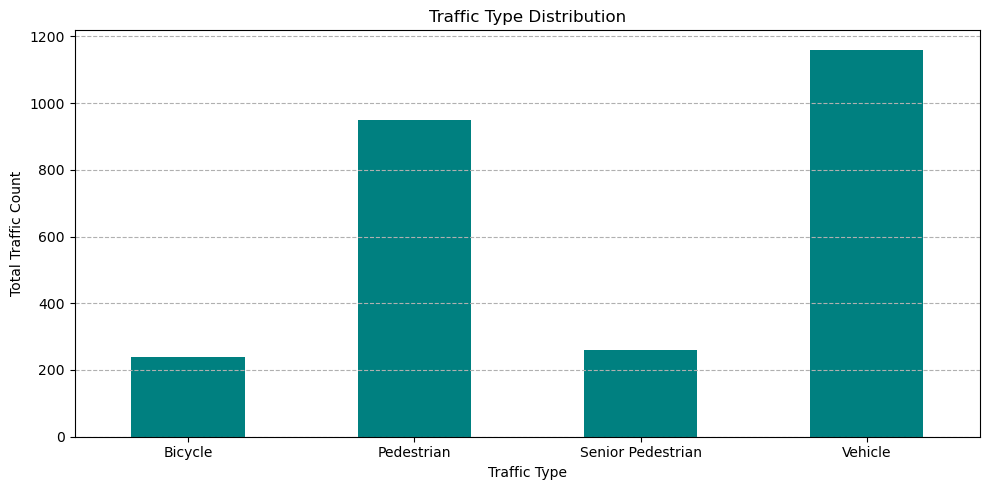

In [13]:
time_columns = traffic_data.columns.drop(['Traffic Type', 'Direction'])
    
# Group by 'Traffic Type' and sum only the time columns
traffic_type_distribution = traffic_data.groupby('Traffic Type')[time_columns].sum().sum(axis=1)

plt.figure(figsize=(10, 5))
traffic_type_distribution.plot(kind='bar', color='teal')
plt.title('Traffic Type Distribution')
plt.xlabel('Traffic Type')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

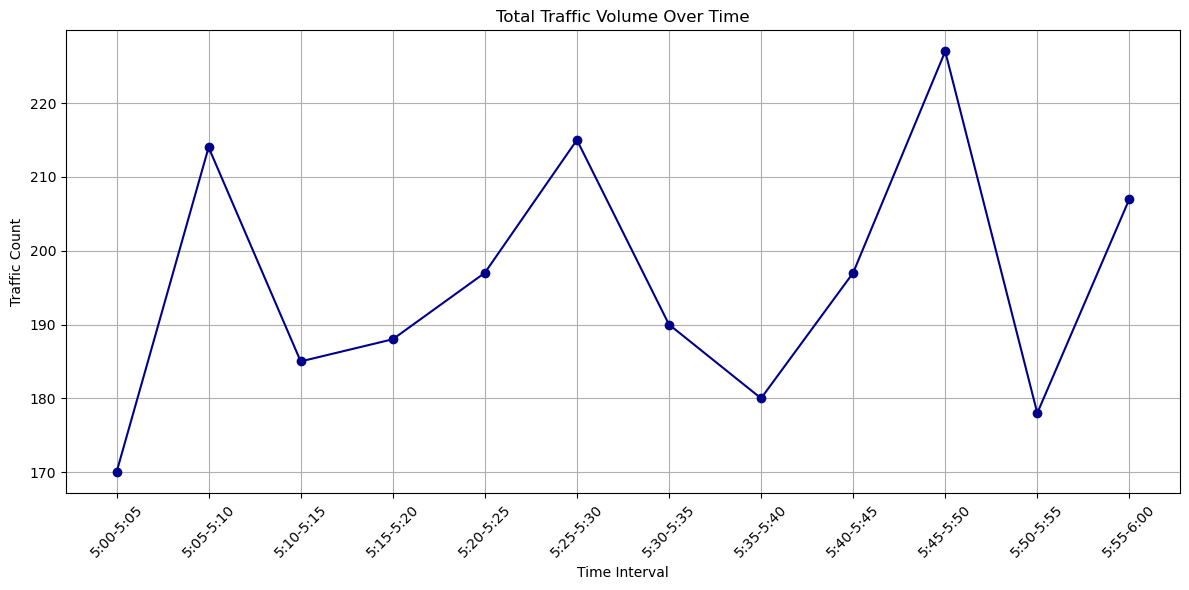

In [16]:
# Select only the rows where 'Traffic Type' is NOT 'senior pedestrian'
filtered_data = traffic_data[traffic_data['Traffic Type'] != 'Senior Pedestrian']

# Summing up traffic counts for each time interval across all types
time_intervals = filtered_data.columns[2:]  # Exclude non-time columns
total_traffic_per_interval = filtered_data[time_intervals].sum()

plt.figure(figsize=(12, 6))
plt.plot(time_intervals, total_traffic_per_interval, marker='o', linestyle='-', color='darkblue')
plt.title('Total Traffic Volume Over Time')
plt.xlabel('Time Interval')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


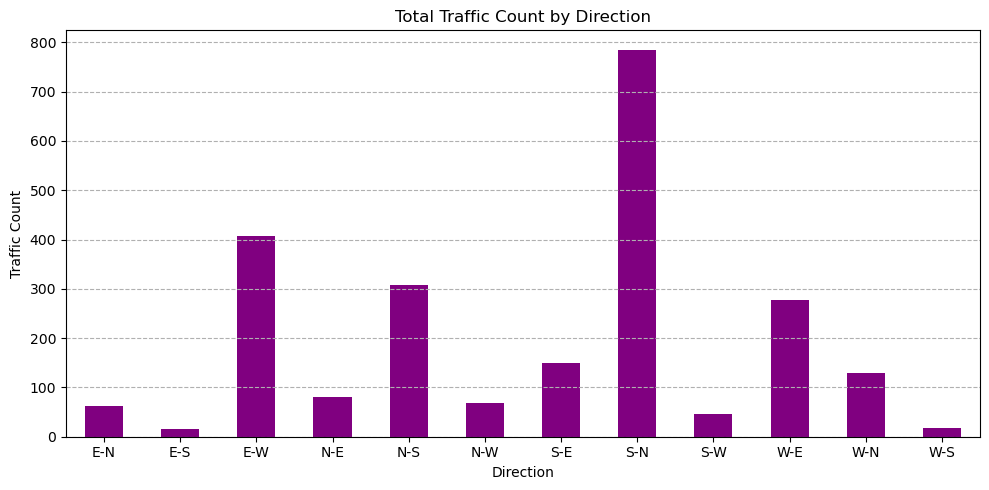

In [19]:
time_columns = filtered_data.columns.drop(['Traffic Type', 'Direction'])

traffic_by_direction = filtered_data.groupby('Direction')[time_columns].sum().sum(axis=1)

plt.figure(figsize=(10, 5))
traffic_by_direction.plot(kind='bar', color='purple')
plt.title('Total Traffic Count by Direction')
plt.xlabel('Direction')
plt.ylabel('Traffic Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


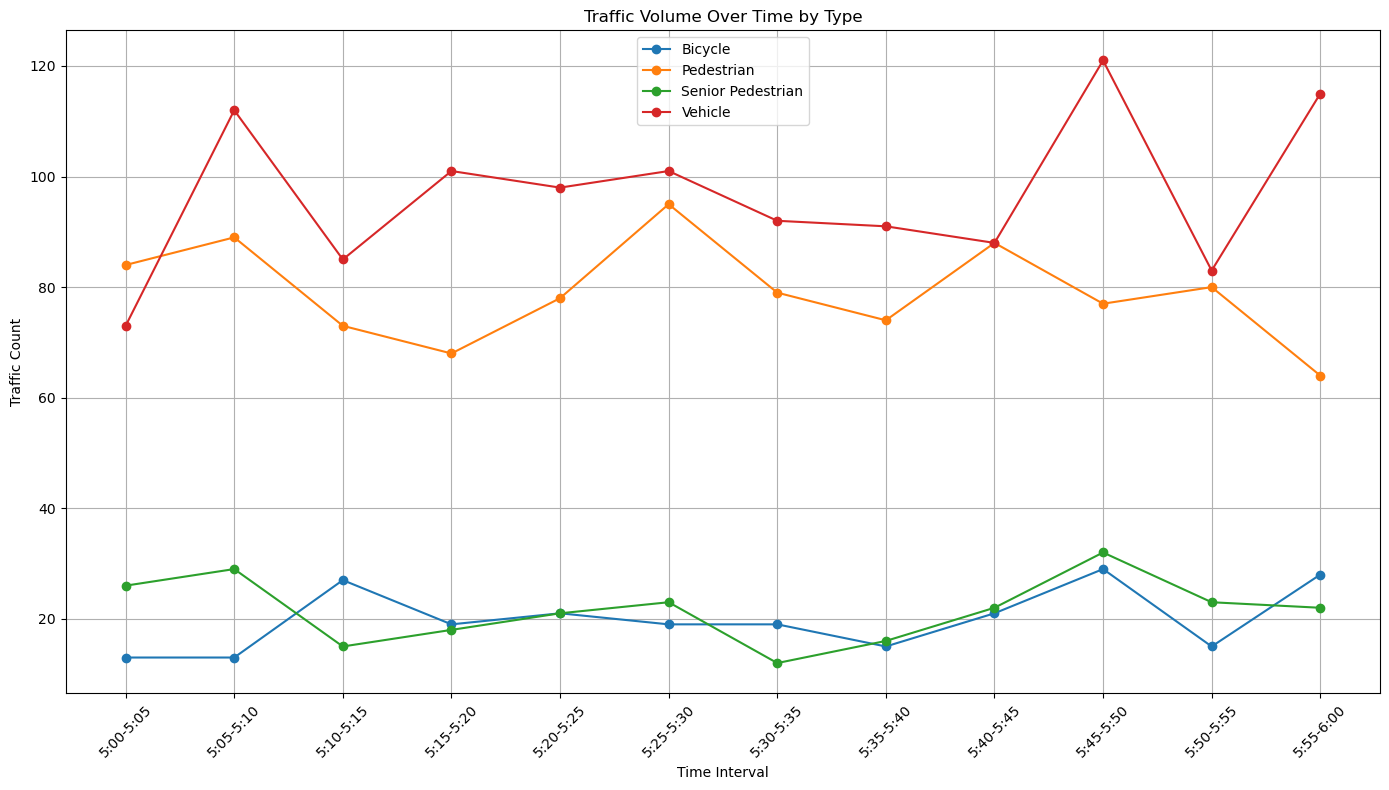

In [20]:
traffic_by_type_and_time = traffic_data.groupby('Traffic Type')[time_intervals].sum().T

plt.figure(figsize=(14, 8))
for traffic_type in traffic_by_type_and_time.columns:
    plt.plot(traffic_by_type_and_time.index, traffic_by_type_and_time[traffic_type], label=traffic_type, marker='o')

plt.title('Traffic Volume Over Time by Type')
plt.xlabel('Time Interval')
plt.ylabel('Traffic Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


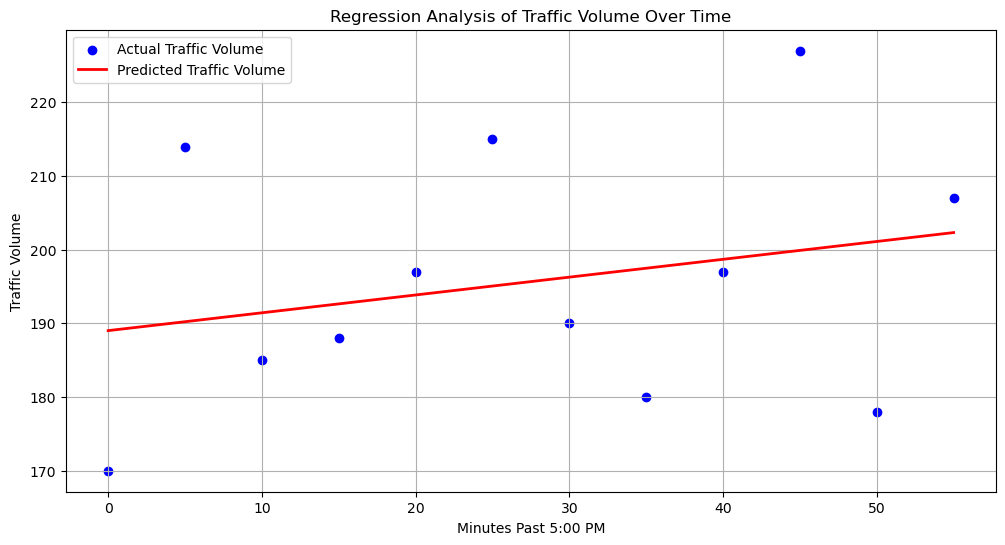

(array([0.24195804]), 189.0128205128205)

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

time_numeric = np.array([int(t.split(':')[1].split('-')[0]) for t in time_intervals])
X = time_numeric.reshape(-1, 1)  # Feature matrix
y = total_traffic_per_interval.values  # Target vector

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Traffic Volume')
plt.plot(X, y_pred, color='red', label='Predicted Traffic Volume', linewidth=2)
plt.title('Regression Analysis of Traffic Volume Over Time')
plt.xlabel('Minutes Past 5:00 PM')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

# Model Coefficients
model.coef_, model.intercept_
